# Data Science Investigation
## Introduction
In this investigation, I am comparing two classifiers: a Decision Tree Classifier and a Random Forest Classifier to determine which model makes more accurate predictions on the Titanic dataset. The predictions are based on the Titanic project which asks competitors to make a predictive model which determines whether a passenger survived the Titanic disaster. The steps used to create and evaluate the model are based on the 7 steps of machine learning.
### What is a Decision Tree Classifier?
Decision Tree Classifiers are trees with nodes which are used to classify categorical data, instead of numerical. The number of nodes is dependant on the number of features required to classify each value. The model makes a prediction by traversing through the nodes (the hierarchy of nodes is determined by impurity of the particular feature - Gini Impurity is a popular method used to do this). 
### What is a Random Forest Classifier?
Random Forest Classifiers can be though of as multiple decision trees constructed by using random features. They are also used to classify categorical data (as it is a classifier) but are sometimes used instead of Decision Tree Classfiers to resolve the issue of __overfitting__ (this is discussed in greater depth later in the notebook). Predictions are made by running each value down every decision tree and taking the aggregate score of all the Decision Trees (e.g. if "True" was selected 5 times and "False" was selected twice, the prediction made by the random forest would be "True").
## Hypotheses
I am predicting that the Random Forest Classifier will outperform the Decision Tree Classifier. Although the two models are very similar, random forests prevent overfitting. Solving this helps to increase the accuracy of a predictive model.

I also think that the feature that will have the strongest effect on prediction will be the sex of the individual as I feel that this value will have the lowest Gini Impurity out of the features selected.

For the Decision Tree Classifier, I am expecting an accuracy rate of 85% on training and 75% on the validation data. For the Random Forest Classifier, I anticipate a slight increase, to 90% on the training data and an accuracy of 85% for the validation data.

## Set Up
The machine learning model being prepared will be trained to the training data to make predictions. Important information for setting up the machine learning model is detailed in the comments.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualisation purposes
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,plot_tree # Our model and a handy tool for visualising trees
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Gathering and Exploring Data

Now that the model has been prepared for training, a dataset needs to be accessed in order to make predictions. In this instance, I have accessed the Titanic dataset.  

Why the Titanic dataset is suitable for making predictions:
*     Is in .csv format
*     Contains mostly numerical values
*     May contain categorical values but with limited options such as   male/female.
*     Doesn't have many missing values.

In [ ]:
train_file_path = '../input/titanic/train.csv'

# Create a new Pandas DataFrame with our training data
titanic_train_data = pd.read_csv(train_file_path)

#titanic_test_data.columns
titanic_train_data.describe(include='all')
#titanic_train_data.head()

## Choosing Model
I opted to use a Decision Tree Classifier to make predictions on the Titanic dataset for a few reasons:
* Easy to construct and interpret
* Capable of handling both numerical and categorical data
* Accuracy is higher as the size of the dataset increases
* Efficient algorithm.
I felt that the above characterisitcs of Descision Tree Classifiers made suitable the model suitable for making predictions on the data.

## Prepare the Data
### Dropping Columns with Empty Values
In this notebook, the predictive model determines whether a passenger would survive the Titanic disaster. The feature that should be selected as the prediction target is the "__Survived__" column. Before the prediction target is separated from the rest of the features, all the columns that have missing values need to be removed (the machine learning model cannot handle these columns).

In [ ]:
# Let's reduce our data to only the features we need and the target.
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Create our new training set containing only the features we want
prepared_data = titanic_train_data[selected_columns]

# Drop rows (axis=0) that contain missing values
prepared_data = prepared_data.dropna(axis=0)

# Check that you still have a good 'count' value. The value should be the same for all columns.
# If your count is very low then you may need to remove features with the lowest count.
prepared_data.describe(include='all')

### Separating Features and Prediction Target
Now that the data has no missing values, separate the prediction target from the rest of the data. The reason for the prediction target being separated from the rest of the data is to ensure that the training data is completely separated from the validation data. In this example, the prediction target is the column, "Survived". The reason is that the objective of the Titanic competition is to create a machine learning model, which determines whether a person survived the Titanic disaster with a high level of accuracy.

In [ ]:
# Separate out the prediction target
y = prepared_data.Survived

# Drop the target column (axis=1) from the original dataframe and use the rest as our feature data
X = prepared_data.drop('Survived', axis=1)

# Take a look at the data again
X.head()
#y.head()

### One Hot Encoding
Since the dataset contains categorical data (e.g. "Sex"), this data needs to be converted into numbers so that the classifier can incorporate this feature. One Hot Encoding is a popular method used to do this. This method converts the categorical data into two columns which contain binary numbers, with "1" indicating it fits the column and "0" meaning that it does not. An example of this is in the diagram below.
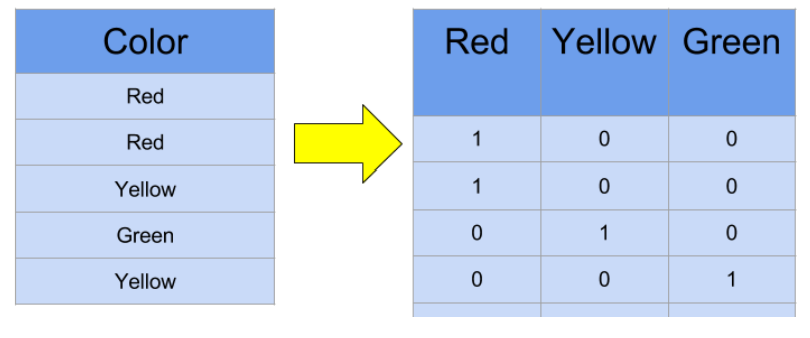

A common method of implementing one hot encoding in Python is using the __get_dummies__ function.

In [ ]:
# One hot encode the features. This will only act on columns containing non-numerical values.
one_hot_X = pd.get_dummies(X)
# Prints out summary of table. The one hot encoded feature has been split into two columns.
one_hot_X.head()

### Splitting Data into Training and Validation Data
It is important to separate the data into these two subsets so that it can be determined if the model is underfit or overfit. This is helpful when evaluating the performance of the predictive model. The ratio for splitting data into training and validation can significantly affect the performance of the predictive model as data that is "easier to predict" reduces the validity of the accuracy score given to the model.

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(one_hot_X, y, random_state = 1)

## Training a Model
Now that the data that can be processed by a machine learning model, let's train the model onto this data to make some predictions. In this example, predictions are being made using a __Decision Tree Classifier__ which makes categorical predictions, rather than numerical predictions and can deal with continuous data.

In [ ]:
# Create a decision tree classifier with a maximum depth of 3 for easy display later on
# Try changing the max_depth to see what happens
dtclf = DecisionTreeClassifier(max_depth=3)

# Train the model on the one hot encoded data
dtclf.fit(train_X, train_y)

## Visualising the Decision Tree Classifier
Now that the model has been trained to the dataset, let's plot the decision tree to get an idea of the process the Decision Tree Classifier uses to make predictions. 

In [ ]:
# Let's plot the tree to see what it looks like!
plt.figure(figsize = (20,10))
plot_tree(dtclf,
          feature_names=one_hot_X.columns,
          class_names=['perished', 'survived'],
          filled=True)
plt.show()

### Measuring Accuracy of Predictions
The predictions were very accurate on the first few columns of the training data. To ensure this trend remains consistent throughout the rest of the training data, let's verify the accuracy of our model. Since the model chosen is a classifier, Mean Absolute Error is not a suitable method for checking the accuracy of the model. Instead, accuracy can be calculated by comparing training or validation set values to predictions.

Testing accuracy of predictions on training data.

In [ ]:
# Create variable for making predictions on training data.
pred_y = dtclf.predict(train_X)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(train_y, pred_y))

Testing accuracy of predictions on validation data.

In [ ]:
# Create variable for making predictions on validation data.
pred_y = dtclf.predict(val_X)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_y, pred_y))

## Evaluating Performance of Model 
### Adjusting Hyperparameters
Now that the Decision Tree Classifier seems to be working, let's test the accuracy of the predictions after merging the training and validation datasets.

In [ ]:
print("Making predictions for the first 5 passengers in the training set.")

# Get the first five predictions as a list.
pred = dtclf.predict(one_hot_X)

print("The predictions are:")

# Merge actual target values and predictions back in with original features to see how we went.
X['Survived'] = y
X['Predicted'] = pred

X.head()

# Random Forests
Although the model performed well, let's try to improve the accuracy of predictions by using a random forest. Random forests take random values from the training data and use this to construct multiple decision trees. The prediction (i.e. True or False) that made the highest amount of times from the trees is taken as the prediction for a particular value.

In [ ]:
# New imports
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
rfclf = RandomForestClassifier(n_estimators=100)

# Train the model
rfclf.fit(train_X,train_y)

In [ ]:
# Predict training data
pred_y = rfclf.predict(train_X)
# Measuring accuracy of training predictions.
print("Accuracy:",metrics.accuracy_score(train_y, pred_y))

# Predict validation data.
pred_y = rfclf.predict(val_X)
# Measuring accuracy of validation predictions.
print("Accuracy:",metrics.accuracy_score(val_y, pred_y))

## Evaluation
### How Did Each Model Perform and Why This Occurred?
Surprisingly,the Decision Tree Classifier produced the same level of the accuracy in the training and validation data. A possible explanation for this is that the Decision Tree Classfier hit the sweet spot between a complex and simple model. This is something I was not expecting - I thought the Decision Tree Classifier would overfit the data.

But the Random Forest Classifier, which is supposed to resolve the issue of overfitting, was far more accurate on the training than the validation data. Although the predictions were more accurate on the training and validation data for the random forest, this model seemed the most overfit out of the two.

### Why are Random Forest Classifiers are More Accurate than Decision Tree Classfiers?
Unlike Decision Trees Classfiers, Random Forests do not look for the best prediction, instead making multiple random predictions. This means that a Random Forest does not rely on one tree which means the predictions are more diverse, which increases the smoothness of the predictions.

## Conclusion
The purpose of the investigation is to compare two classifiers: a Decision Tree Classifier and a Random Forest Classifier and determine which model is better at determining who survived the Titanic disaster. The predictions I made were in relation to the relative performance (which classifier will be the most accurate), which feature I thought would influence the results the most and how accurate I thought the model would be. I feel that my predictions were quite accurate.

### Were my Hypotheses Correct?
To an extent my first prediction, whether the Decision Tree Classifier would outperform the Random Forest Classifier was accurate as the random forest proven to be the more accurate model. I also stated the random forests resolve the issue of overfitting, but that seems to have backfired.

I was correct when I predicted that the feature that would have the highest effect on accuracy was "Sex". This is because this feature is located in the root node. __Note__: the root node value usually has the lowest Gini Impurity but I ran out of time to adjest the order of my hyperparameters.

The accuracies for my Decision Tree Classifier were reasonably accurate as I predicted an 85% for training data and a 75% for the validation data. The actual accuracy rates were ~82% for both subsets. My Random Forest Classifier predictions were also reasonably accurate, as I predicted a 90% accuracy on the training data and an 85% accuracy on the validation data, compared to a 99% accuracy on the training data and a 83% on the validation data.